In [2]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import scipy.misc as misc
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
def norm_res(predicted, observed, errors):
    res = observed-predicted
    return res / errors 

def chi_2(predicted, observed, errors):
    return np.sum(((observed-predicted) / errors) ** 2)

def red_chi_2(predicted, observed, errors, DoF):
    return np.sum(((observed-predicted) / errors) ** 2) / DoF


In [113]:
x = np.array([15, 20, 25, 30, 35, 40, 45, 47.5, 50, 52.5, 55, 57.5, 60, 65, 70, 75, 80])
y = np.array([218, 200, 181, 161, 130, 91, 85, 71, 53, 39, 31, 29, 45, 103, 164, 500, 1200])
xerr = [1 for i in range(len(x))]
yerr = y * 0.05

for i, yerr_i in enumerate(yerr):
    if yerr_i < 5:
        yerr[i] = 5

len(yerr)

17

In [114]:
def brewster(theta_i, n_2, I, I_bg):
    cos_theta_r = np.sqrt(n_2 ** 2 - np.sin(np.radians(theta_i)) ** 2) / n_2
    num = n_2 * np.cos(np.radians(theta_i)) - cos_theta_r
    den = n_2 * np.cos(np.radians(theta_i)) + cos_theta_r
    return I * (num / den) ** 2 - I_bg

# Does the simple fit
init_params=[1.4, 1200, 5]
lin_opt, lin_cov = opt.curve_fit(brewster, x, y, p0=init_params)

# Simple Best fit values
n_2, I, I_bg = lin_opt
dn_2, dI, dI_bg = np.sqrt(np.diag(lin_cov))

def brewster_fitted(theta_i):
    cos_theta_r = np.sqrt(n_2 ** 2 - np.sin(np.radians(theta_i)) ** 2) / n_2
    num = n_2 * np.cos(np.radians(theta_i)) - cos_theta_r
    den = n_2 * np.cos(np.radians(theta_i)) + cos_theta_r
    return I * (num / den) ** 2 - I_bg


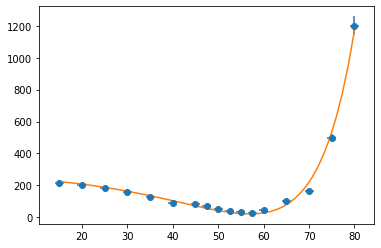

In [115]:
plt.errorbar(x, y, yerr=yerr, xerr=xerr, fmt='o')
plt.plot(np.linspace(15, 80), brewster(np.linspace(15, 80), n_2, I, I_bg))

In [120]:
# Uses non-weighted model to estimate how the error in x permutates to error in y

def push_xerr(x, xerr, y, yerr, fitted_model):
    pushed_xerr = xerr * misc.derivative(fitted_model, x)
    add_quad = np.sqrt(yerr ** 2 + pushed_xerr ** 2)
    return add_quad

yerr_adj = push_xerr(x, xerr, y, yerr, brewster_fitted)

In [121]:
# Does the fit with adjusted xerr
init_params=[n_2, I, I_bg]
lin_opt, lin_cov = opt.curve_fit(brewster, x, y, sigma=yerr_adj, absolute_sigma=True, p0=init_params)

#Weighted Best Fit Values
n_2, I, I_bg = lin_opt
dn_2, dI, dI_bg = np.sqrt(np.diag(lin_cov))

# red_chi_sq = red_chi_2(malus_fitted(x), y, yerr_adj, len(x) - 3)

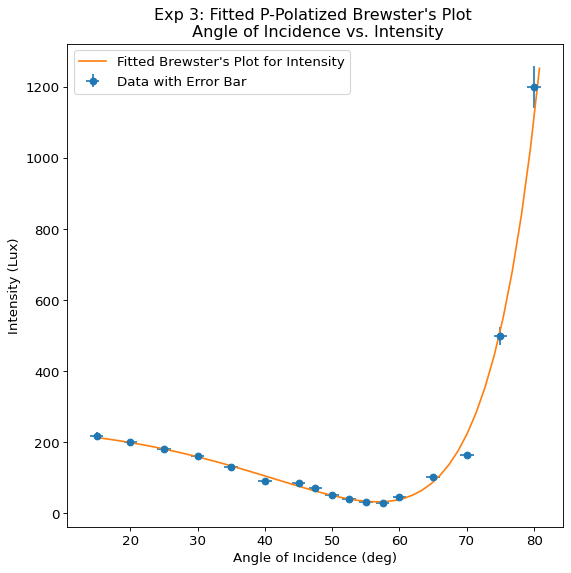

In [137]:
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(x, y, yerr=yerr, xerr=xerr, fmt='o', label="Data with Error Bar")
x_space = np.linspace(x[0],x[-1]+.8)
plt.plot(x_space, brewster(x_space, n_2, I, I_bg), label='Fitted Brewster\'s Plot for Intensity', color='tab:orange')

plt.title("Exp 3: Fitted P-Polatized Brewster's Plot \n Angle of Incidence vs. Intensity")
plt.xlabel("Angle of Incidence (deg)")
plt.ylabel("Intensity (Lux)")

# plt.text(.14,-.55, "k = %5.4f \u00b1 %5.4f $kg/s^2$" % (-m, dm))
# plt.text(.14,-.7, "c = %5.4f \u00b1 %5.4f $N$" % (b, db))
# plt.xlim(0,.257)
# plt.ylim(-3.7,0)
plt.legend()
plt.show()

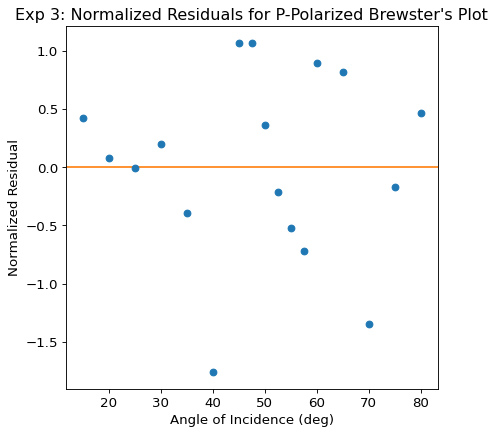

In [141]:
fig2=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(x, norm_res(brewster_fitted(x), y, yerr_adj), fmt='o')
plt.axhline(color='tab:orange')

plt.title("Exp 3: Normalized Residuals for P-Polarized Brewster's Plot")
plt.xlabel("Angle of Incidence (deg)")
plt.ylabel("Normalized Residual")
plt.show()


In [143]:
red_chi_2(brewster_fitted(x), y, yerr_adj, len(x) - 3)

0.7323223443713148

In [144]:
n_2

1.525471642469398

In [145]:
dn_2

0.022615823938159686

In [147]:
n_2, I, I_bg

(1.525471642469398, 4594.527155877082, -32.300200919682084)

In [148]:
dn_2, dI, dI_bg

(0.022615823938159686, 337.540974018102, 2.6302746852023096)

In [151]:
np.sqrt(.02**2+.1**2) * 2

0.20396078054371142

In [153]:
np.degrees(np.arctan(np.radians(1.53)))

1.5296364852679758